In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

In [2]:
circuit = QuantumCircuit(3, 3)


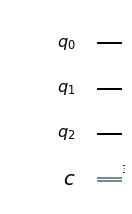

In [3]:
%matplotlib inline
circuit.draw(output = 'mpl')

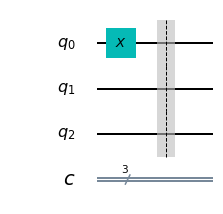

In [4]:
#Take state in q0 and transport to q2. q1 is the intermediate resource we are going to use to accomplish this
#Apply an x gate to q0 to go to 1 state from 0 state.

circuit.x(0)
circuit.barrier() #Right after barrier we have state 1 on q0. We plan to teleport that to q2
circuit.draw(output = 'mpl')

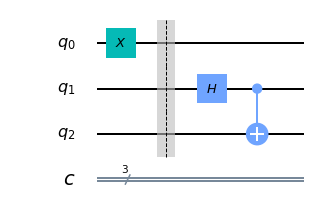

In [5]:
#Teleportation Protocol - first create entanglement b/w 0 and 2
circuit.h(1)#Hadamard gate on 1
circuit.cx(1,2)#Controlled x gate b/w 1 and 2
circuit.draw(output = 'mpl')

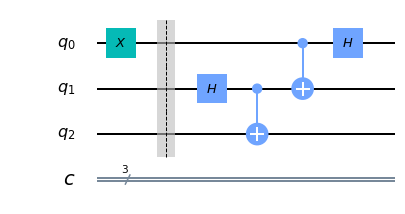

In [6]:
#Teleportation Protocol - next we apply the following two gates
circuit.cx(0, 1)
circuit.h(0)
circuit.draw(output = 'mpl')

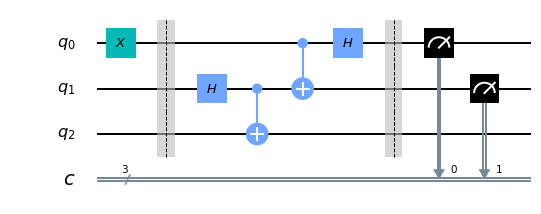

In [7]:
#Teleportation Protocol - next we measure q0 and q1
circuit.barrier()
circuit.measure([0,1],[0,1])
circuit.draw(output = 'mpl')

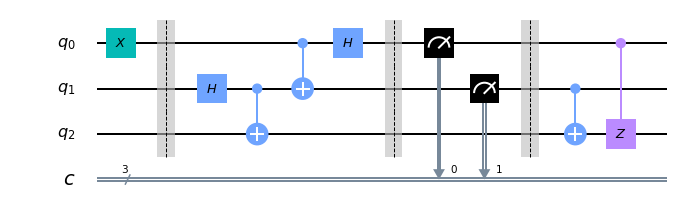

In [8]:
#Teleportation Protocol - Finally we apply the following two gates to complete protocol
circuit.barrier()
circuit.cx(1,2)
circuit.cz(0,2)
circuit.draw(output = 'mpl')
#State 1 of q0 now teleported to q2

In [9]:
#When we measure q2, we should see 1
circuit.measure(2,2)
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()

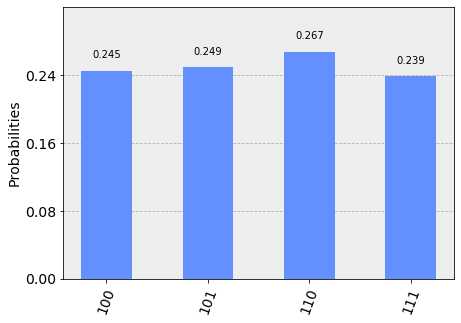

In [10]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)
#The numbers on the x-axis are the values of c2, c1, c0... in that order. Note that c2 always has value 1. We had asked q2 to be measured and stored in c2. Therefore, it does not come as a surprise that c2 is always 1. Teleportation cmplete!

In [11]:
print (counts)

{'110': 273, '100': 251, '101': 255, '111': 245}
